In [2]:
%pylab inline

import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Problem 4

In [98]:
def generate_points(K, d):
    
    def generate_centres(K, d):
        angle = 2*np.pi/K
        radius = (d/2.0) / np.sin(angle/2)
        centres = np.array([[np.sin(x*angle)*radius, np.cos(x*angle)*radius] for x in range(K)])
        return centres
    
    centres = generate_centres(K, d)
    return np.array([[np.random.normal(a_i, 1, 1000), np.random.normal(b_i, 1, 1000)] for (a_i, b_i) in centres]), centres

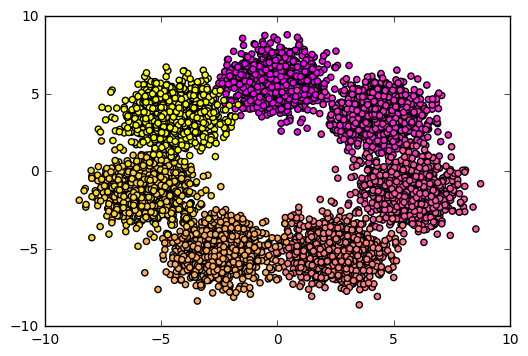

In [99]:
clouds, _ = generate_points(7, 5)
x, y = clouds[:, 0, :].ravel(), clouds[:, 1, :].ravel()
scatter(x, y, c=[clouds.shape[2]*[x] for x in range(clouds.shape[0])], cmap="spring")

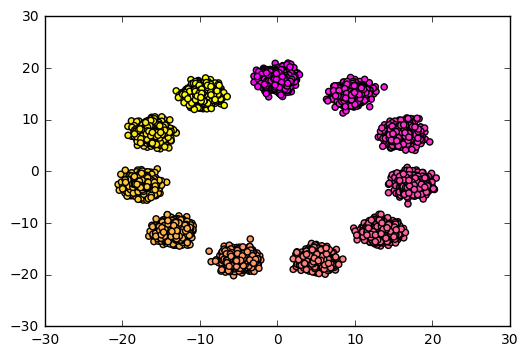

In [100]:
clouds, _ = generate_points(11, 10)
x, y = clouds[:, 0, :].ravel(), clouds[:, 1, :].ravel()
scatter(x, y, c=[clouds.shape[2]*[x] for x in range(clouds.shape[0])], cmap="spring")

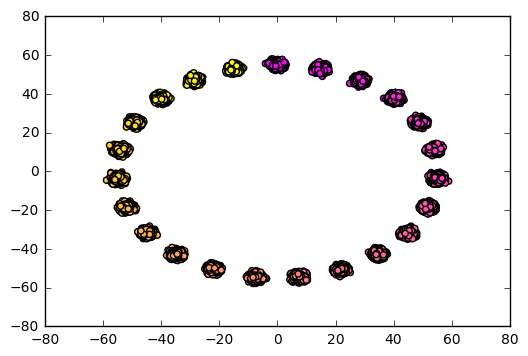

In [101]:
clouds, _ = generate_points(23, 15)
x, y = clouds[:, 0, :].ravel(), clouds[:, 1, :].ravel()
scatter(x, y, c=[clouds.shape[2]*[x] for x in range(clouds.shape[0])], cmap="spring")

# Problem 5

Miss centre rate: 10.35%


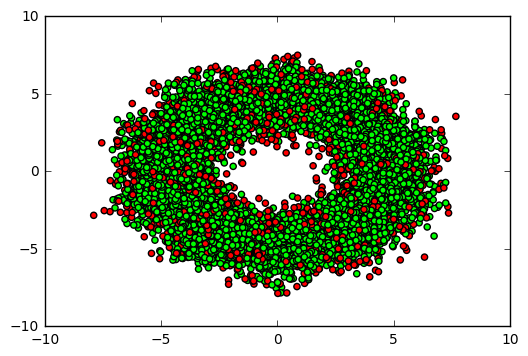

In [119]:
clouds, centres = generate_points(10, 2.96)
distances = ((centres[:, np.newaxis, :, np.newaxis] - clouds)**2).sum(axis=2)
nearest_centre = distances.argmin(axis=1)
true_centres = np.array([clouds.shape[2]*[x]for x in range(clouds.shape[0])])
hits = nearest_centre == true_centres

x, y = clouds[:, 0, :].ravel(), clouds[:, 1, :].ravel()
scatter(x, y, c=["lime" if hit else "red" for hit in hits.ravel()])
print "Miss centre rate: {}%".format(100.0 * (len(hits.ravel()) - sum(hits))/len(hits.ravel()))